# Modelos no supervisados

Los modelos de aprendizaje no supervisado son aquellos en los que el modelo se encarga de entender la estructura intrínseca y comúnmente oculta de los datos que les proporcionamos para poder descubrir patrones importantes para nosotros. 

A diferencia de los modelos de aprendizaje supervisado donde necesitábamos definir la variable dependiente de salida, en los modelos de aprendizaje no supervisado deben descubrir por sí mismos las características comunes entre los distintos datos para poder agrupar los datos en distintos grupos, también conocidos como clusters. 

En el mundo real, los datos que conseguimos para el entrenamiento de nuestros modelos no suelen venir identificados con las etiquetas para poder entrenar los modelos de clasificación. Estos modelos de aprendizaje no supervisado es una herramienta excelente para poder encontrar las distintas clases que puedan existir en nuestros datos. Luego el científico de datos deberá identificar qué etiqueta es la mejor para cada grupo y poder proceder al entrenamiento del modelo de clasificación. 

Ese proceso se llama segmentación de los datos y se utiliza también para analizar grupos de población para marketing, la detección de anomalías en los datos, la agrupación de documentos o la búsqueda de clientes con intereses comunes basados en sus compras.

Los modelos de aprendizaje no supervisado se utilizan para realizar tareas de agrupación de datos como hemos explicado. Uno de los algoritmos más comunes en esta familia de modelos es el K-medias. Otros modelos dentro de la familia de aprendizaje no supervisado son: 
- Mezcla de distribuciones gausianas
- DBSCAN
- BIRCH
- Agregación jerárquica.

Vamos a definir algunos conceptos que sobn útiles a la hora de entender los modelos de agrupación o clustering:

### Distancia
La principal medida que utilizan los modelos de clustering a la hora de decidir si un ejemplo en nuestro set de datos pertenece a un grupo u otro suele ser la distancia entre ese ejemplo en concreto y los centros de los grupos que ha identificado el modelo. La distancia que se utiliza más habitualmente es la distancia euclídea, pero existen otras distancias que se pueden aplicar a estos modelos como la distancia del coseno, la distancia de Manhattan, la distancia de Mahalanobis, etc... 

### Centroide
Como hemos explicado los modelos de agrupación o clustering crean grupos de datos en base a la distancia entre los distintos datos y el centro de los grupos. Esos centros de los grupos, se llaman centroides y son los puntos que minimizan la distancia entre todos los datos que pertenecen al grupo y el centroide.

## K-Medias (K-Means)
Es uno de los modelos de agrupación más comúnmente utilizado por su simplicidad y su eficiencia a la hora de entrenar el modelo. 

Este modelo se basa en la creación de K grupos en nuestros datos basándose en la distancia euclídea entre los distintos puntos que le proporcionemos al modelo durante el entrenamiento. Cuanto más cerca, menor sea la distancia, estén los datos, más similares son y con más probabilidades de pertenecer al mismo grupo o cluster. 

La forma en la que el modelo funciona es que selecciona de forma aleatoria K centroides para los grupos que va a identificar. Luego calcula la distancia de todos los puntos a cada centroide y asigna a cada punto la etiqueta del grupo del centroide que se encuentre más cercano. Después,el modelo corrige la posición del centroide de cada grupo para moverlo al punto en el que se minimiza la distancia entre todos los puntos de un grupo y el centroide. Dado que los centroides se han movido, el proceso de asignación de etiquetas empieza de nuevo y el modelo calcula de nuevo la distancia de todos los datos a cada centroide y asigna nuevas etiquetas. Se vuelve a corregir la posición de los centroides para minimizar la distancia desde los centroides a los puntos que pertenecen a su grupo y el proceso vuelve a empezar. 

Este enfoque iterativo sigue adelante hasta que se llegue al número máximo de iteraciones que queremos que ejecute el modelo, que es uno de los hiperparámetros que podemos controlar en este tipo de modelo. 

Los modelos de K-medias utilizan la distancia euclídea para medir las distancias de los puntos a los centroides y debidas a las propiedades matemáticas de ese tipo de distancia estos modelso tienen un menor rendimiento si los datos no presentan una distribución esférica. 

Otro detalle que tenemos que tener en cuenta a la hora de utilizar un modelo de K-medias, y cualquier otro modelo que utilice distancias a la hora de hacer sus cálculos, es que tenemos que asegurarnos de que todas las variables de entrada se deben medir en la misma escala. Por ello, es muy importante hacer una estandarización de los datos a una escala común. Si no hacemos este paso de preparación de los datos, estaremos dando más importancia a unas variables de entrada frente a otras y los resultados no serían válidos. 

### ¿Cómo identificamos el valor óptimo de K? 

Un valor de K muy alto nos produce clusters que son muy similares entre sí y que probablemente se podrían combinar entre sí y un valor de K muy pequeño nos produce clusters muy grandes con grandes diferencias entre los datos que forman parte del cluster y que probablmente se podrían serparar en otros clusters más pequeños. ¿Cómo escogemos el mejor valor de K?

En realidad no existe una única forma de seleccionar el valor del hiperparámetro K para el modelo de k-medias. El conocimiento del campo del que se han extraido los datos o decisiones de negocio pueden ayudarnos a decidir el valor de K que queremos utilizar. 

Si buscamos un método analítico para identificar el valor de K que debemos utilizar, entonces el método del codo es el enfoque preferido. 

Es un enfoque basado en mostrarnos los valores ascendentes de K frente al error total al usar ese K. El objetivo es encontrar el valor de K adecuado para que el error no disminuya de forma significativamente si aumentamos el valor de K. 

Veamos el siguiente ejemplo: 
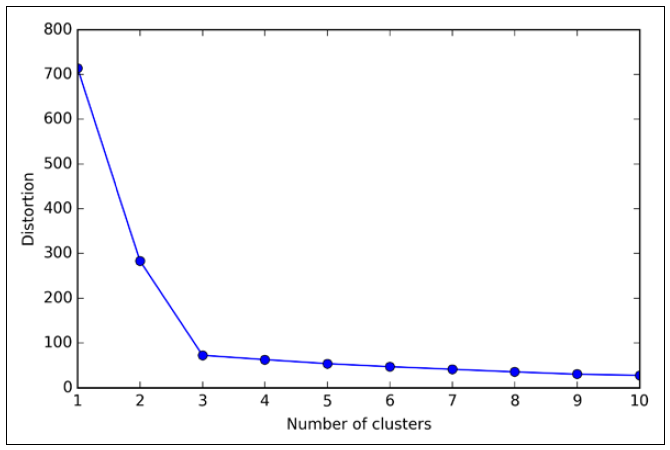

El error que se produce con la asignación de los distintos clusters va descendiendo según aumentamos el valor de K. En ese ejemplo, el valor óptimo sería 3, puesto que vemos que es donde se produce el codo de la gráfica y donde vemos el cambio de tendencia. Aumentar el número de clusters por encima de 3 no produce una reducción significativa del error de asignación de los clusters, mientras que reducir el número de clusters por debajo de 3 produce un aumento significativo del error de asignación de los clusters.

Vamos a ver un ejemplo de aplicación de un modelo de K-medias:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [16]:
# Cargamos nuestros datos, en este caso sobre canciones extraidas de Spotify

df = pd.read_csv("songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


¿Qué podríamos mirar como parte del proceso de EDA? 

Text(0.5, 1.0, 'Top estilos musicales')

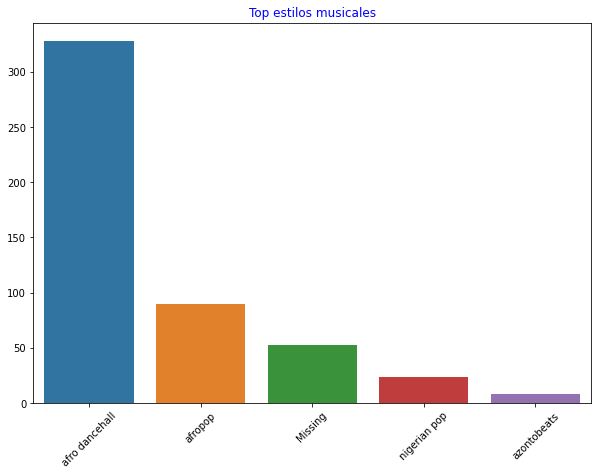

In [17]:
# Vamos a echar un vistazo a la distribución de las canciones por estilo musical

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index, y=top[:5].values)
plt.xticks(rotation=45)
plt.title("Top estilos musicales",color='blue')

In [18]:
# Vamos a seleccionar las columnas que vamos a utilizar para nuestro modelo. 
# En este caso, vamos a seleccionar 'artist_top_genre','popularity','danceability','acousticness','loudness' y 'energy'
# Dado que 'artist_top_genre' es una variable categórica, tenemos que codificarla a valores numéricos

label_encoder = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

# utilizamos la función fit_transform para que el encoder aprenda las categorías que tiene
# la variable 'artist_top_genre' y haga la transformación en valores numéricos en un solo paso.
# También podríamos llamar a las funciones fit y transform por separado si queremos.
X['artist_top_genre'] = label_encoder.fit_transform(X['artist_top_genre'])


In [19]:
# Vamos a aplicar una transformación adicional a nuestros datos para asegurarnos de que todas las variables
# están utilizando la misma escala. Primero vemos los datos originales
X.head()

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
0,5,48,0.666,0.8510,-6.699,0.420
1,3,30,0.710,0.0822,-5.640,0.683
2,14,40,0.836,0.2720,-7.127,0.564
3,16,14,0.894,0.7980,-4.961,0.611
4,3,25,0.702,0.1160,-6.044,0.833


In [20]:
# Como podemos ver, la escala de las distintas variables son distintas, así que vamos a corregirlo
# para evitar problemas a la hora de calcular distancias

standard_scaler = StandardScaler()
scaled_X = standard_scaler.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X,index=X.index, columns = X.columns)
scaled_X_df.head()

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
0,0.681599,1.607041,-0.644052,2.813365,-0.709215,-2.295406
1,0.151133,0.658389,-0.269300,-0.880216,-0.279053,-0.523088
2,3.068695,1.185418,0.803851,0.031649,-0.883067,-1.325011
3,3.599161,-0.184858,1.297842,2.558735,-0.003245,-1.008285
4,0.151133,0.394874,-0.337437,-0.717829,-0.443156,0.487740


Ahora todas las variables están utilizando la misma escala y podemos calcular distancias de forma segura. 

In [21]:
# Vamos a crear nuesto modelo
kmeans = KMeans(n_clusters=2, random_state = 123)

In [22]:
# Vamos a entrenar nuestro modelo
kmeans.fit(scaled_X_df)

KMeans(n_clusters=2, random_state=123)

In [24]:
# Vamos a mostrar a qué cluster el modelo asigna a cada fila de nuestros datos
clusters_kmeans = kmeans.predict(scaled_X_df)
clusters_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

Vemos un array que nos dice a qué cluster ha asignado el modelo a cada fila de nuestros datos (0 o 1). 

Hemos escogido un valor de dos clusters para nuestro modelo. ¿Es el mejor valor posible? Vamos a calcular el método del codo para descubrirlo! 

In [25]:
# definimos una nueva lista que va a tener el error de asignación de los clusters para cada valor de K

wcss = []

# Probamos diferentes valores de K 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(scaled_X_df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


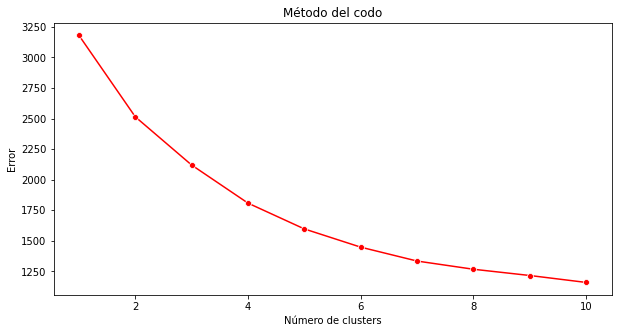

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Error')
plt.show()

In [31]:
wcss[5]

1448.3632400129056

En este caso en concreto no vemos un codo muy claro y la decisión sobre el valor de K dependerá del criterio del científico de datos que esté tratando estos datos y otros factores como el conocimiento del dominio y las necesidades de negocio para el problema que queremos resolver. 

En cualquier caso, podemos ver que 2 no es un buen valor para K por lo que vamos a probar con 4 y vamos a visualizar los grupos que nos genera

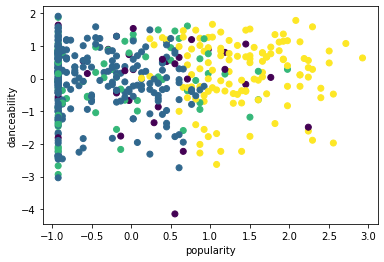

In [34]:
new_kmeans = KMeans(n_clusters=4)
new_kmeans.fit(scaled_X_df)
labels = new_kmeans.predict(scaled_X_df)

plt.scatter(scaled_X_df['popularity'], scaled_X_df['danceability'], c=labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

Hemos mostrado los grupos que hemos creado en función de dos de las variables que hemos utilizado para el entrenamiento del modelo. Vemos que los clusters se encuentran muy mezclados entre sí (probablemente porque los datos no tienen una distribución esférica que es cuando mejor funciona el modelo de K-medias) y vemos que hay muchos valores de popularity que están concentrados en -1. ¿Quizás podamos investigar los datos un poco más y hacer alguna otra transformación que nos de mejores resultados?